<h1 align=center><font size = 5>Udemy Review Analysis</font></h1> 

### **Tabla de contenidos**

  1. [Planteamiento del problema e hipótesis](#q1) 
  2. [Importacion de librerias y CSV](#q2) 
  4. [Análisis exploratorio](#q3)
  5. [Análisis de días y hora donde se hacen las reviews](#q4)
  6. [Conclusiones](#q5)
  7. [Más allá del dataset](#q6)
  8. [Anexo: análisis de palabras](#q7)

### Planteamiento del problema <a name="q1"></a>

En los próximos años se crearán millones de puestos de trabajo relacionados a la tecnología. (*) 

Dada la alta demanda que hay sobre cursos de IT, explicado por la creciente oferta de puestos de trabajo y las nuevas formas de acceder a estos de manera online, se quiere hacer un análisis sobre los cursos relacionados con esta temática ofrecidos por la plataforma Udemy, como así también entender la valoración que los usuarios tienen de los mismos.

(*) Fuente: https://www.semana.com/economia/articulo/cuantos-empleos-creara-la-tecnologia-durante-los-proximos-anos/310510/

#### Hipótesis

1) Los cursos con mayor rating son los que más inscriptos tienen. 

2) A mayor duración del curso, en horas, menor cantidad de reviews ya que los usuarios no terminan cursos tan largos y prefieren cursos cortos.   

3) A menor dificultad, mayor rating. A mayor dificultad, mayor duración del curso y menor rating ya que los usuarios más avanzados necesitan cursos más largos y son más exigentes con la calidad del mismo.   

#### Importación de librerías y CSV <a name="q2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Para transformar la notación científica
pd.options.display.float_format = '{:,.2f}'.format #Separador de miles y 2 decimales

In [2]:
#Importamos dos archivos CSV

df_reviews = pd.read_csv('udemy_review.csv', sep=';')
df_courses = pd.read_csv('udemy_course.csv', sep=';')

In [3]:
# Vemos las algunas filas del dataset de reviews

df_reviews

,course_id,rating,review_content,date
0,8082,4.50,Delivers more than expected. Thank you!,29/07/2019 11:19
1,8082,2.50,This course would be a good choice if 1) you a...,22/06/2019 11:25
2,8082,5.00,I am new to Ruby but have programmed in Python...,14/01/2019 12:40
3,8082,4.00,The instructor has provided quite a lot of inf...,04/12/2018 08:03
4,8082,5.00,"Hare Kṛṣṇa, Hare Kṛṣṇa, Kṛṣṇa Kṛṣṇa, Hare Hare...",16/11/2018 19:12
...,...,...,...,...
488753,2544521,5.00,By far the best course i have seen on udemy,07/09/2019 01:36
488754,2544521,5.00,Knowledgeable instructor keep up the good work,13/09/2019 03:41
488755,2544521,5.00,excellent course on powerapps,10/09/2019 03:18
488756,2544521,5.00,totally amazing course. All I need to make the...,16/09/2019 03:30


Las columnas de este dataset de reviews representan:  

- course_id: identificador único del curso.
- rating: puntaje que le dio el usuario.
- review_content: comentario del usuario. 
- date: fecha de la review.

In [4]:
# Vemos las algunas filas del dataset de cursos 

df_courses

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.00,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,"182,000.00",All Levels,Ruby
1,8203,Basic and Advanced HTML Lessons,1550,12,15,1.00,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,"182,000.00",All Levels,HTML
2,8319,Git Basics: In Theory and Practice,291,12,31,7.50,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,"182,000.00",All Levels,Git
3,8324,Javascript for Beginners,3840,258,48,3.00,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,"182,000.00",All Levels,JavaScript
4,8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.00,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,"182,000.00",All Levels,HTML
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,2541578,Developing RESTful Java Web Services using Spr...,1139,5,16,1.50,03/09/2019 00:00,05/09/2019 16:53,03/09/2019 14:07,280000,"182,000.00",Beginner,Spring Boot
9239,2544521,Learn Microsoft Powerapps From Scratch,97,10,17,0.60,05/09/2019 00:00,06/09/2019 17:09,05/09/2019 07:51,840000,"182,000.00",Beginner,Microsoft PowerApps
9240,2545909,Learn Complete HTML Tutorials with Projects fo...,4355,6,68,13.50,12/09/2019 00:00,08/09/2019 00:53,06/09/2019 01:41,2310000,"182,000.00",All Levels,Web Development
9241,2547143,Learn Coding: C++ & Python,2044,4,104,11.00,07/09/2019 00:00,10/09/2019 19:32,06/09/2019 18:30,1540000,"182,000.00",Beginner,C++


Las columnas de este dataset de cursos representan:

- course_id: identificador único del curso.
- course_name: nombre del curso.
- subs: cantidad de personas anotadas al curso.
- num_reviews: número total de reviews.
- num_lectures: cantidad de capítulos del curso.
- duration: duración del curso en horas.
- last_update: fecha y hora en la que el contenido del curso fue actualizado.
- publish_date: fecha y hora en la que el curso fue publicado.
- created_date: fecha y hora en la que el curso fue creado.
- original_price: precio original.
- discount_price: descuento en el precio del curso.
- level: nivel de dificultad del curso.
- label: tópico (930 tópicos sobre IT).

A continuación vamos a calcular el rating promedio de cada curso y lo vamos a unir con el dataset de cursos. Es decir, el resultado final será una fila por cada curso, donde se le anexará el rating promedio de todas las calificaciones que obtuvo.

In [5]:
#Calculamos el rating promedio por curso

df_rating = df_reviews.groupby(['course_id']).agg({'rating':np.mean}).reset_index()
df_rating.head()

,course_id,rating
0,8082,4.42
1,8203,4.00
2,8319,3.06
3,8324,4.11
4,8325,4.48


In [6]:
#Mergeamos ambos datasets por el campo en común, course_id, para usar el dataset joineado para el análisis

df = pd.merge(df_rating,df_courses,on='course_id')

### Análisis exploratorio <a name="q3"></a>

In [7]:
#Observamos las primeras filas del dataset con el rating promedio incluído

df.head()

,course_id,rating,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,4.42,Ruby Programming for Beginners,28445,643,56,6.00,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,"182,000.00",All Levels,Ruby
1,8203,4.00,Basic and Advanced HTML Lessons,1550,12,15,1.00,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,"182,000.00",All Levels,HTML
2,8319,3.06,Git Basics: In Theory and Practice,291,12,31,7.50,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,"182,000.00",All Levels,Git
3,8324,4.11,Javascript for Beginners,3840,258,48,3.00,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,"182,000.00",All Levels,JavaScript
4,8325,4.48,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.00,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,"182,000.00",All Levels,HTML


In [8]:
#Vemos la cantidad de filas y columnas del dataset

print("El dataset cuenta con", df.shape[0], "filas y", df.shape[1], "columnas")

El dataset cuenta con 8710 filas y 14 columnas


In [9]:
# Vemos Información del dataset en general

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8710 entries, 0 to 8709
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_id       8710 non-null   int64  
 1   rating          8710 non-null   float64
 2   course_name     8710 non-null   object 
 3   subs            8710 non-null   int64  
 4   num_reviews     8710 non-null   int64  
 5   num_lectures    8710 non-null   int64  
 6   duration        8710 non-null   float64
 7   last_update     8686 non-null   object 
 8   publish_date    8710 non-null   object 
 9   created_date    8710 non-null   object 
 10  original_price  8710 non-null   int64  
 11  discount_price  8547 non-null   float64
 12  level           8707 non-null   object 
 13  label           8700 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1020.7+ KB


In [10]:
#Vemos que las columnas last_update, publish_date y created_date son objeto por lo tanto las transformaremos a tipo datatime

df['last_update']=pd.to_datetime(df['last_update'], format = '%d/%m/%Y %H:%M')
df['publish_date']=pd.to_datetime(df['publish_date'], format = '%d/%m/%Y %H:%M')
df['created_date']=pd.to_datetime(df['created_date'], format = '%d/%m/%Y %H:%M')

In [11]:
#Corroboramos que los tipos de datos hayan cambiado

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8710 entries, 0 to 8709
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   course_id       8710 non-null   int64         
 1   rating          8710 non-null   float64       
 2   course_name     8710 non-null   object        
 3   subs            8710 non-null   int64         
 4   num_reviews     8710 non-null   int64         
 5   num_lectures    8710 non-null   int64         
 6   duration        8710 non-null   float64       
 7   last_update     8686 non-null   datetime64[ns]
 8   publish_date    8710 non-null   datetime64[ns]
 9   created_date    8710 non-null   datetime64[ns]
 10  original_price  8710 non-null   int64         
 11  discount_price  8547 non-null   float64       
 12  level           8707 non-null   object        
 13  label           8700 non-null   object        
dtypes: datetime64[ns](3), float64(3), int64(5), object(3)
me

In [12]:
#Vemos medidas descriptivas de todos los campos

df.describe(include = "all")

,course_id,rating,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
count,"8,710.00","8,710.00",8710,"8,710.00","8,710.00","8,710.00","8,710.00",8686,8710,8710,"8,710.00","8,547.00",8707,8700
unique,NaN,NaN,8684,NaN,NaN,NaN,NaN,1767,8654,8601,NaN,NaN,4,903
top,NaN,NaN,C Programming For Beginners,NaN,NaN,NaN,NaN,2018-12-03 00:00:00,2016-09-08 20:28:00,2016-07-02 07:02:00,NaN,NaN,All Levels,JavaScript
freq,NaN,NaN,3,NaN,NaN,NaN,NaN,83,4,6,NaN,NaN,4088,403
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-20 00:00:00,2011-06-20 17:48:00,2011-06-14 16:09:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-15 00:00:00,2019-09-12 13:28:00,2019-09-06 01:41:00,NaN,NaN,NaN,NaN
mean,"1,279,782.50",4.06,NaN,"4,694.66",430.04,57.71,6.80,NaN,NaN,NaN,"1,412,079.22","183,607.70",NaN,NaN
std,"642,091.05",0.79,NaN,"16,615.61","3,515.58",66.80,11.09,NaN,NaN,NaN,"963,959.21","24,783.89",NaN,NaN
min,"8,082.00",0.50,NaN,1.00,1.00,4.00,0.37,NaN,NaN,NaN,"280,000.00","182,000.00",NaN,NaN
25%,"785,857.00",3.75,NaN,199.25,14.00,21.00,2.00,NaN,NaN,NaN,"420,000.00","182,000.00",NaN,NaN


**Algunas conclusiones iniciales, analizando las columnas:**

- El dataset está compuesto por **8.710 cursos**. Todos tienen al menos 1 suscriptor. 

- La media de suscriptores a los cursos es de 4.695 alumnos, la mediana 1.056 (distribución sesgada a la derecha) y el curso con más inscriptos tiene 685.057 alumnos.

- La **media de reviews por curso es de 430**, la mediana 39 (distribución sesgada a la derecha) y el curso con más reviews tiene 186.085.

- El curso que más capítulos tiene, tiene 779. En promedio, cada curso tiene 57 capítulos. 

- Los cursos tienen una **duración media de 6 horas** y una mediana de 3,5. El curso más largo, dura 356 horas. 

- Hay 24 cursos donde su last_update es nulo, es decir, hay **24 cursos que nunca fueron actualizados**. 

- El dataset contiene cursos que fueron creados desde el 14 de junio de 2011 hasta el 6 de septiembre de 2019. 

- El precio promedio de los cursos es de $1.421.079 

- Hay 163 cursos que no tienen descuento. 

- Hay **4 niveles de dificultad** en los cursos, siendo el "All levels" el más frecuente (el 46,9% del total)

- Hay **903 labels (tópicos)** siendo JavaScript el más frecuente.

- Hay 3 cursos que no tienen un nivel asociado y 10 que no tienen un tópico asignado. 

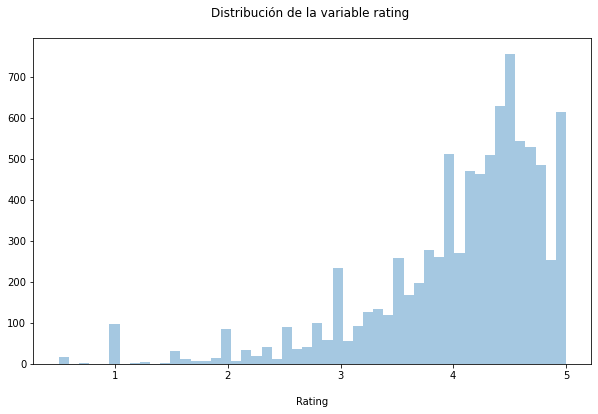

In [13]:
#Analizamos la distribución de la variable rating mediante un histograma

plt.figure(figsize=(10,6))
plt.title('Distribución de la variable rating \n')
sns.distplot(df.rating, kde=False)
plt.xlabel("\nRating")
plt.show()

Este histograma nos permite conocer la valoración general de los cursos, es decir, de la plataforma en general, ya que no estamos observando datos de un nivel, tópico o curso en particular.  

Cabe destacar que la distribución del rating se observa asimétrica a la izquierda y esto se debe a que gran parte de las reviews promedio por curso se ubican entre los 4 y los 5 puntos (siendo 5 el número máximo con el que se puede calificar). El 75% de estas valoraciones son mayores a 3,75. Con esto se puede tener una idea de la valoración positiva que tienen los usuarios de la plataforma. 

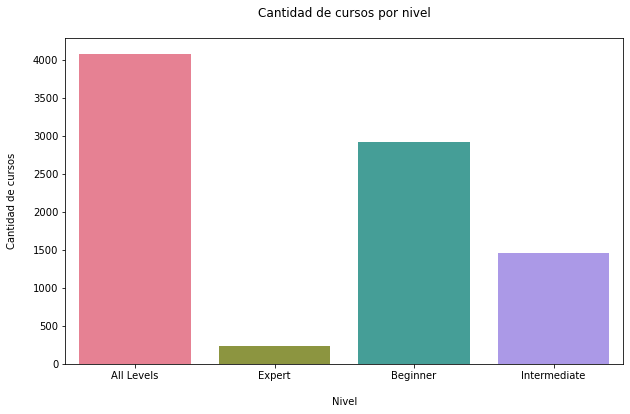

In [14]:
#Analizamos la distribución de los niveles de los cursos

plt.figure(figsize=(10,6))
sns.countplot(x='level', data=df, palette="husl")
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nNivel")
plt.ylabel("Cantidad de cursos\n")
plt.title('Cantidad de cursos por nivel\n')
plt.show()

Como se puede observar en este gráfico de barras, de los 8.710 cursos que estamos analizando, más de 4.000 se corresponden con "All level", que son aquellos que comienzan desde un nivel principiante hasta avanzando dentro del mismo programa.  

Luego de los cursos "All level", continúan los cursos iniciales en cantidad ofrecida, con casi 3.000. Esto es algo importante de destacar porque implica que el público de estos cursos demanda programas que ayuden con las bases de lo que quieren estudiar.

El tercer lugar, con caso 1.500 cursos, se encuentra el nivel intermedio y por último el nivel experto con menos de 500 cursos. Esto es algo que se podría estudiar en mayor profundidad: ¿hay poca oferta de estos cursos porque hay pocos estudiantes avanzados en general o porque los estudiantes avanzados prefieren otras plataformas?

In [15]:
#Creamos función para grafica de boxplot

def boxplot(columna, titulo, ejex=0, ejey=0):
    plt.figure(figsize=(15,2))
    sns.boxplot(columna)
    plt.title(titulo)
    plt.xlabel(ejex)
    plt.show()
    
#Creamos función para grafica de boxplot sin outliers

def boxplot_out(columna, titulo, ejex=0, ejey=0):
    plt.figure(figsize=(15,2))
    sns.boxplot(columna, showfliers=False)
    plt.title(titulo)
    plt.xlabel(ejex)
    plt.show()

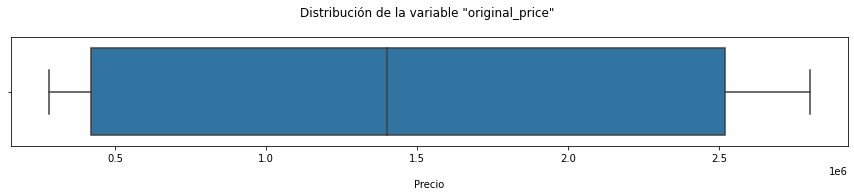

In [16]:
#Analizamos la distribución de la variable original_price mediante un boxplot

boxplot(df.original_price, 'Distribución de la variable "original_price" \n', '\nPrecio')

En el boxplot anterior se observa que la mediana del precio de los cursos se ubica apenas por debajo de los $1.500.000, muy cercana a la media de 1.421.079.

In [17]:
#Serie de tiempo con cantidad de cursos publicados por año

df['Year'] = df['publish_date'].dt.year 
time = df.groupby(['Year']).size().reset_index(name='count')
time['variation'] = (time['count'] - time['count'].shift(1)) / time['count']
time

,Year,count,variation
0,2011,17,NaN
1,2012,65,0.74
2,2013,224,0.71
3,2014,477,0.53
4,2015,963,0.50
5,2016,1337,0.28
6,2017,1959,0.32
7,2018,2459,0.20
8,2019,1209,-1.03


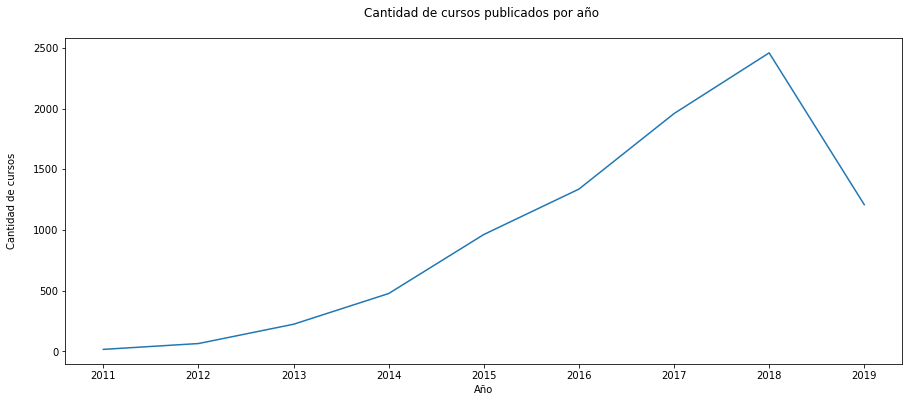

In [18]:
#Analizamos la cantidad de cursos publicados a lo largo de los años

plt.figure(figsize=(15,6))
sns.lineplot(data = time, x="Year", y="count")
plt.title('Cantidad de cursos publicados por año \n')
plt.ylabel('Cantidad de cursos\n')
plt.xlabel('Año\n')
plt.show()

En este gráfico, en conjunto con la tabla que le da origen, vemos la evolución de la cantidad de cursos que se han ido publicando en la plataforma año tras año, comenzando en el 2011 con 17 cursos y aumentando de manera muy importante año a año. Esto se puede explicar por varios factores:  
-Mayor interés de las personas en realizar cursos relacionados a la tecnología.  
-Mayor adaptación de los usuarios a realizar cursos en línea, que hace algunos años no eran tan comunes.  
-Facilidad de acceso a estos cursos en comparación con la educación tradicional (universidades, terciarios, institutos).  
-Precio accesible de los programas formativos.  

Cabe destacar que en el 2019 vemos una caída. Esto se debe a que el dataset contempla datos de cursos creados hasta el 6 de septiembre de 2019, es decir, el año 2019 no está completo.

In [19]:
# Serie de tiempo con cantidad de cursos publicados por año por nivel

#df['Year'] = df['publish_date'].dt.year 
time_level = pd.pivot_table(df, values='course_id', index=['Year'],
                    columns=['level'], aggfunc='count')
time_level[['All Levels', 'Beginner', 'Intermediate', 'Expert']]

level,All Levels,Beginner,Intermediate,Expert
Year,,,,
2011,16.00,NaN,NaN,1.00
2012,57.00,5.00,3.00,NaN
2013,110.00,88.00,21.00,5.00
2014,329.00,89.00,53.00,6.00
2015,627.00,241.00,81.00,14.00
2016,673.00,441.00,194.00,29.00
2017,672.00,758.00,437.00,91.00
2018,"1,040.00",864.00,475.00,78.00
2019,564.00,435.00,194.00,16.00


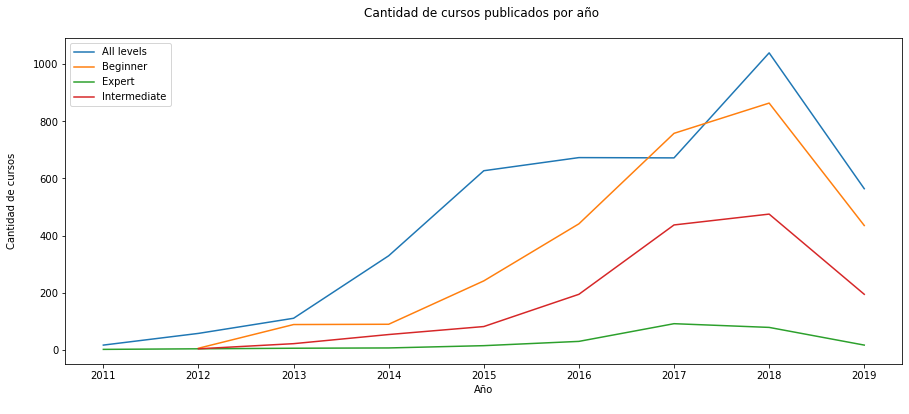

In [20]:
#Analizamos la cantidad de cursos publicados a lo largo de los años

plt.figure(figsize=(15,6))
sns.lineplot(data = time_level, x="Year", y="All Levels", label= "All levels")
sns.lineplot(data = time_level, x="Year", y="Beginner", label= "Beginner")
sns.lineplot(data = time_level, x="Year", y="Expert", label= "Expert")
sns.lineplot(data = time_level, x="Year", y="Intermediate", label= "Intermediate")
plt.title('Cantidad de cursos publicados por año \n')
plt.ylabel('Cantidad de cursos\n')
plt.xlabel('Año\n')
plt.show()

Con la tabla y gráfico anteriores se puede agregar algunos comentarios respecto a la cantidad de cursos que se han publicado en la plataforma año a año.

En general hubo un aumento bastante parejo en la cantidad de cursos publicados por nivel. En 2014 se observa un aumento superior de cursos "All levels", que sigue aumentando y solo es superado por cursos de nivel "Beginner" en 2017. En 2018 se distingue una baja muy pequeña en la cantidad de cursos publicados con nivel "Expert".

Nuevamente se menciona que en el año 2019 se ve una caída en la cantidad de cursos, y esto se debe a que el dataset contempla datos hasta el 6 se septiembre de dicho año.

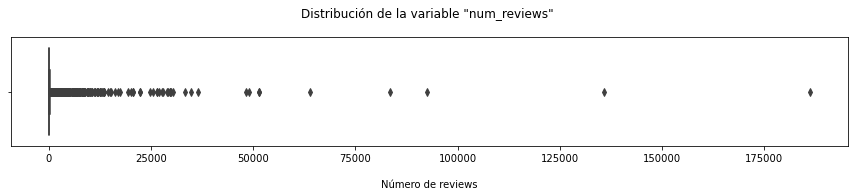

In [21]:
#Analizamos la distribución de la variable num_reviews mediante un boxplot

boxplot(df.num_reviews, 'Distribución de la variable "num_reviews" \n', '\nNúmero de reviews')

Debido a la presencia de valores extremos, no se puede llegar a una conclusión sobre la distribución de la variable, por lo que se procederá a analizar la distribución sin ellos.

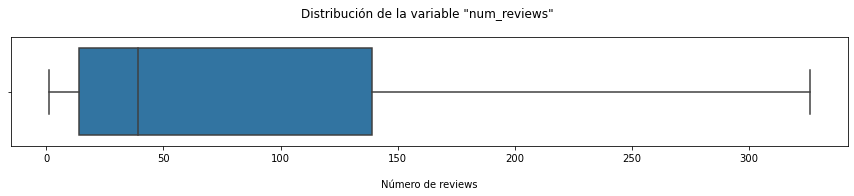

In [22]:
#Analizamos la distribución de la variable num_reviews mediante un boxplot sin outliers

boxplot_out(df.num_reviews, 'Distribución de la variable "num_reviews" \n', '\nNúmero de reviews')

En cuanto a la distribución del número de reviews por curso, esta tiene una mediana de aproxidamente 40 reviews. El 75% de los cursos tienen menos de 140 reseñas aproximadamente. 

Por otra parte si se observa el boxplot sin outliers, hay cursos que tienen gran cantidad de reseñas lo que hace que la media sea muy superior al segundo cuartil.

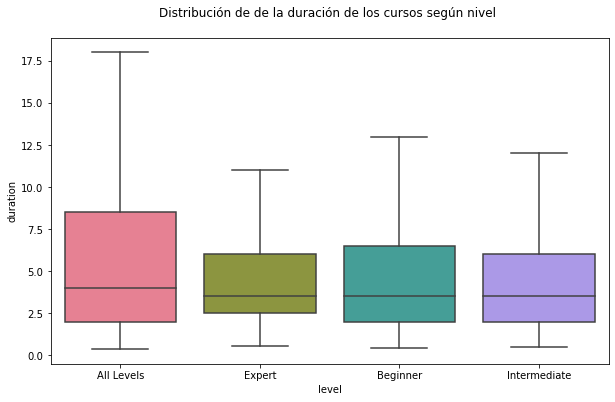

In [23]:
#Analizamos la duración de los cursos según nivel con boxplot sin outliers

plt.figure(figsize=(10,6))
plt.title('Distribución de de la duración de los cursos según nivel \n')
sns.boxplot(x="level", y="duration", data=df, palette='husl', showfliers=False)
plt.show()

Si se realiza un boxplot para conocer la distribución de la duración del curso en horas, dividido en niveles, se puede conocer: 
- La duración de los cursos tiene una mediana similar, alrededor de las 4 horas. 
- Los cursos correspondientes a "All levels" llegan a durar hasta 18 horas aproximadamente (sin outliers). Esto puede explicarse con la variedad de temas que son vistos en los mismos, desde niveles básicos a más avanzados.  
- Los cursos de nivel experto son los que menor variación tienen en su duración, seguidos por los de nivel intermedio y luego los iniciales.

In [24]:
#Creamos una tabla con los inscriptos por nivel, cantidad de cursos y ratio de inscriptos por curso. 

df_subs = df.groupby(['level'])[['subs']].sum()
df_q_courses = df.groupby(['level'])[['course_id']].count()
df_ratio = pd.merge(df_subs, df_q_courses, on='level')
df_ratio['ratio_subs'] = df_ratio['subs']/df_ratio['course_id']
df_ratio.sort_values(by=['subs'],ascending=False)

,subs,course_id,ratio_subs
level,,,
All Levels,25476774,4088,"6,232.09"
Beginner,11027986,2921,"3,775.41"
Intermediate,4067861,1458,"2,790.03"
Expert,316940,240,"1,320.58"


En la tabla anterior se tienen 3 columnas:  
-Subs: cantidad de personas inscriptas a cursos por nivel.  
-Course_id: cantidad de cursos publicados por nivel.  
-ratio_subs: para poder hacer comparaciones, se calculó un ratio de inscriptos por curso (Qinscriptos/Qcursos)

Dicha tabla resulta muy útil para saber que el promedio de personas inscriptas a cursos, según el nivel, baja a medida que la complejidad del curso se hace mayor.

In [25]:
#Creamos una pivot table con los 10 cursos con mayor cantidad de inscriptos

df.pivot_table('subs', 'course_name').sort_values(by=['subs'],ascending=False).head(10)

,subs
course_name,
Complete Python Bootcamp: Go from zero to hero in Python 3,"685,057.00"
The Web Developer Bootcamp,"460,682.00"
Java Programming Masterclass for Software Developers,"357,090.00"
Learn HTML5 Programming From Scratch,"316,033.00"
Complete C# Unity Developer 2D: Learn to Code Making Games,"315,197.00"
Angular 8 (formerly Angular 2) - The Complete Guide,"289,745.00"
The Complete Web Developer Course 2.0,"229,326.00"
The Complete Python 3 Course: Beginner to Advanced!,"227,017.00"
The Complete JavaScript Course 2019: Build Real Projects!,"223,264.00"


In [26]:
#Creamos una pivot table con los 10 tópicos con mayor cantidad de cursos

df_q_courses = df.groupby(['label'])[['course_id']].count().sort_values(by=['course_id'],ascending=False)
df_q_courses.head(10)

,course_id
label,
JavaScript,403
Python,385
Unity,251
Java,242
WordPress,177
Android Development,172
PHP,167
Swift,166
Web Development,155


Este análisis de se podría hacer a lo largo de los años, ya que por ejemplo, en los últimos años se podría observar un aumento de los cursos relacionados a datos, que tiempo atrás no eran tan populares. 

In [27]:
#Construimos una matriz de correlación para ver la relación entre las variables

df.corr(method='spearman')

,course_id,rating,subs,num_reviews,num_lectures,duration,original_price,discount_price,Year
course_id,1.00,0.09,-0.19,-0.27,0.02,0.05,0.20,0.01,0.97
rating,0.09,1.00,0.14,0.17,0.16,0.16,0.01,-0.00,0.10
subs,-0.19,0.14,1.00,0.73,0.21,0.18,0.07,-0.02,-0.18
num_reviews,-0.27,0.17,0.73,1.00,0.36,0.34,0.10,-0.02,-0.25
num_lectures,0.02,0.16,0.21,0.36,1.00,0.85,0.33,-0.01,0.04
duration,0.05,0.16,0.18,0.34,0.85,1.00,0.32,0.01,0.06
original_price,0.20,0.01,0.07,0.10,0.33,0.32,1.00,0.03,0.19
discount_price,0.01,-0.00,-0.02,-0.02,-0.01,0.01,0.03,1.00,0.01
Year,0.97,0.10,-0.18,-0.25,0.04,0.06,0.19,0.01,1.00


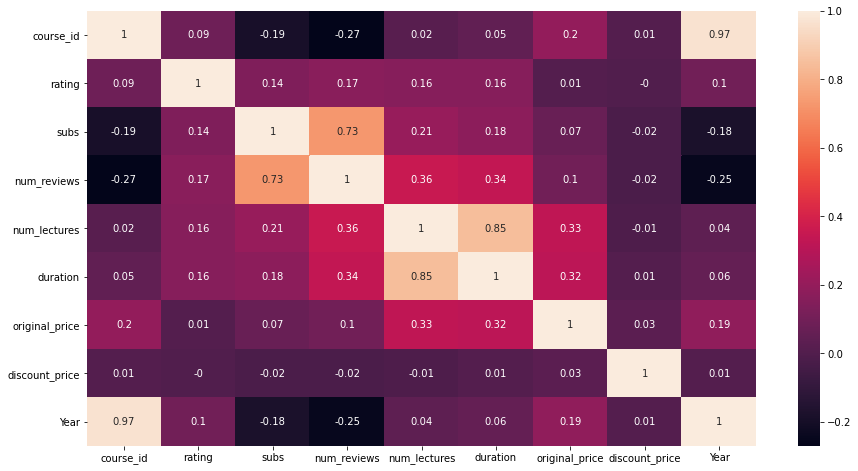

In [28]:
#Graficamos la correlación

plt.figure(figsize=(15,8))
sns.heatmap(round(df.corr(method='spearman'),2),annot=True)
plt.show()

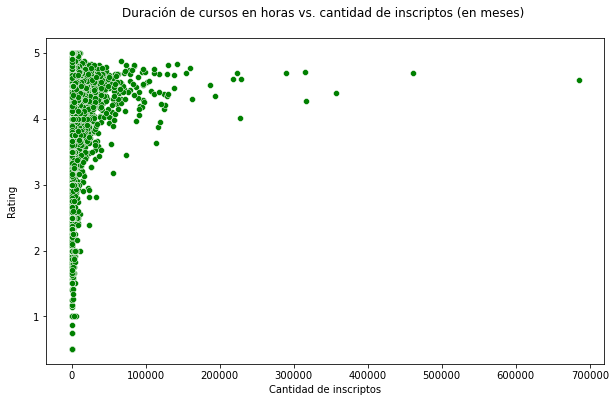

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= df.subs, y=df.rating, color='g')
plt.title('Duración de cursos en horas vs. cantidad de inscriptos (en meses) \n')
plt.ylabel('Rating\n')
plt.xlabel('Cantidad de inscriptos\n')
plt.show()

Mediante la tabla de correlación y el gráfico de dispersión se puede responder a las hipótesis del punto 1 y 2. 

1) Los cursos con mayor rating son los que más inscriptos tienen.  

2) A mayor duración del curso, en horas, menor cantidad de reviews ya que los usuarios no terminan cursos tan largos y prefieren cursos cortos.  

En cuanto a la primera hipótesis, se contempla que hay una correlación positiva chica (0,14) entre la cantidad de inscriptos a un curso y su rating. Esto puede explicarse ya que si un curso tiene referencias positivas, el usuario se verá más atraído a realizarlo, a su vez que entre ellos mismos se lo recomiendan. Por lo que no rechazamos esta hipótesis.

Para la segunda hipótesis, se observa una correlación positiva moderada (0,34), es decir que a mayor duración de un curso, mayor cantidad de reviews. Por lo que rechazamos la hipótesis propuesta.

In [30]:
#Creamos una tabla con la duración por nivel y el promedio de rating 

df_dur = df.pivot_table('duration','level', aggfunc=np.mean)
df_rat = df.pivot_table('rating','level', aggfunc=np.mean)
df_dur_rat = pd.merge(df_dur, df_rat, on='level')
df_dur_rat.sort_values(by=['duration'],ascending=False)

,duration,rating
level,,
All Levels,7.70,4.12
Beginner,6.45,4.08
Intermediate,5.28,3.94
Expert,5.00,3.55


Con esta tabla se responde la hipótesis 3: "A menor dificultad, mayor rating. A mayor dificultad, mayor duración del curso y menor rating".  

Por un lado: "A menor dificultad mayor rating". Esto se comprueba con los resultados de esta tabla, ya que los cursos Beginner y "All levels" (que incluye beginner) poseen un rating superior al promedio de rating de Intermediate y Expert, siendo este último el de rating más bajo. 

En cuanto a la duración de los cursos, se puede visibilizar como los cursos de menor complejidad tienen una mayor duración (en horas) que los cursos de mayor nivel. Esto se puede explicar desde el punto de vista de que los cursos más iniciales requieren un tiempo adicional en explicaciones de los usos de las herramientas, instalaciones, posibles errores, que no suceden en cursos de nivel experto donde estos temas se obvian.

### Análisis de días y hora donde se hacen las reviews <a name="q4"></a>

In [31]:
#Vemos filas al azar del dataset de reviews

df_reviews.sample(5)

,course_id,rating,review_content,date
346848,1285808,5.00,"The instructor is very clear, the course diagr...",01/12/2018 04:11
390903,1422532,5.00,Thank you for the amazing course.\n\nIt's real...,04/09/2018 04:15
308660,1165096,5.00,"Мне всё нравится, как по мне на второй версии ...",28/04/2017 08:13
183221,781502,5.00,Its good to unterstand,04/02/2018 10:26
117870,560928,1.00,I do not like this course.,31/05/2017 11:14


In [32]:
#Vemos la cantidad de filas y columnas del dataset

print("El dataset cuenta con", df_reviews.shape[0], "filas y", df_reviews.shape[1], "columnas")

El dataset cuenta con 488758 filas y 4 columnas


In [33]:
#Vemos información del dataset para corroborar el tipo de datos de cada columna y si hay nulos

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488758 entries, 0 to 488757
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   course_id       488758 non-null  int64  
 1   rating          488758 non-null  float64
 2   review_content  488678 non-null  object 
 3   date            488758 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.9+ MB


In [34]:
#Transformamos la columna date de objeto a datatime

df_reviews['date']=pd.to_datetime(df_reviews['date'], format = '%d/%m/%Y %H:%M')

In [35]:
#Creamos dos columnas: una con el día de la semana (en número) y otra con la hora

df_reviews['day_of_week'] = df_reviews['date'].apply(lambda time: time.dayofweek)
df_reviews['hour'] = df_reviews['date'].apply( lambda x: x.hour)

In [36]:
#Creamos una columna con el día de la semana en la que fue hecha la review

df_reviews['day'] = df_reviews['day_of_week'].apply(lambda x: 'Lunes' if x == 0 else 'Martes' if x == 1
                                 else 'Miercoles' if x == 2 else 'Jueves' if x == 3
                                 else 'Viernes' if x== 4 else 'Sabado' if x == 5
                                 else 'Domingo' )

In [37]:
#Verificamos las columnas

df_reviews

,course_id,rating,review_content,date,day_of_week,hour,day
0,8082,4.50,Delivers more than expected. Thank you!,2019-07-29 11:19:00,0,11,Lunes
1,8082,2.50,This course would be a good choice if 1) you a...,2019-06-22 11:25:00,5,11,Sabado
2,8082,5.00,I am new to Ruby but have programmed in Python...,2019-01-14 12:40:00,0,12,Lunes
3,8082,4.00,The instructor has provided quite a lot of inf...,2018-12-04 08:03:00,1,8,Martes
4,8082,5.00,"Hare Kṛṣṇa, Hare Kṛṣṇa, Kṛṣṇa Kṛṣṇa, Hare Hare...",2018-11-16 19:12:00,4,19,Viernes
...,...,...,...,...,...,...,...
488753,2544521,5.00,By far the best course i have seen on udemy,2019-09-07 01:36:00,5,1,Sabado
488754,2544521,5.00,Knowledgeable instructor keep up the good work,2019-09-13 03:41:00,4,3,Viernes
488755,2544521,5.00,excellent course on powerapps,2019-09-10 03:18:00,1,3,Martes
488756,2544521,5.00,totally amazing course. All I need to make the...,2019-09-16 03:30:00,0,3,Lunes


In [38]:
#Vamos a analizar los días y momentos del día donde se generan mayor cantidad de reviews.

#Primero creamos intervalos de hora y luego creamos una crosstab con estos intervalos y días de la semana

intervalo_horas = pd.cut(df_reviews['hour'], bins = [-1, 7, 11, 15, 19, 24], labels=["Madrugada 0 a 7",
"Mañana 8 a 11", "Mediodía 12 a 15", "Tarde 16 a 19", "Noche 20 a 23"])

tabla_horas_dias = pd.crosstab(intervalo_horas, df_reviews['day'])

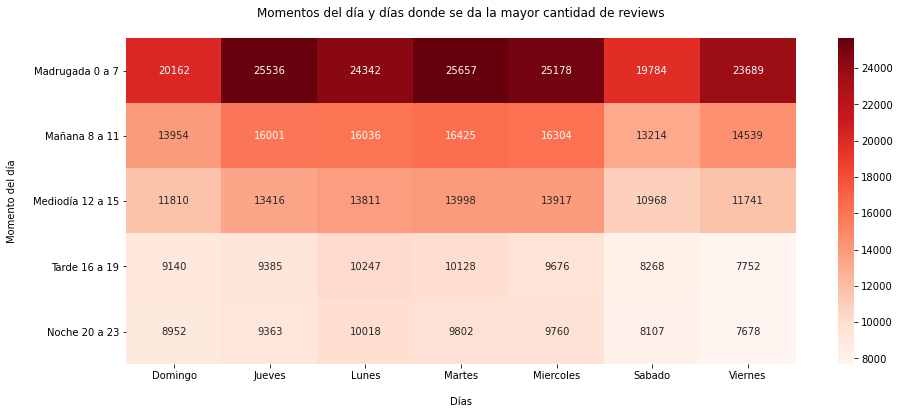

In [39]:
#Vemos esta información en un mapa de calor, combinando día y hora

plt.figure(figsize=(15,6 ))
sns.heatmap(tabla_horas_dias, annot = True, fmt ='g', cmap = 'Reds')
plt.xlabel("\nDías")
plt.ylabel("Momento del día\n")
plt.title('Momentos del día y días donde se da la mayor cantidad de reviews\n')
plt.show()

Con este mapa de calor podemos obtener algunos datos bastante interesantes.  

En primer lugar, podemos mencionar que los estudiantes realizan reviews principalmente a la madrugada. Podemos deducir que las reviews son realizadas en el mismo momento en el que el curso es terminado (si no, se podría tener una columna de fecha y hora de finalización).  

Haciendo esta deducción podemos decir que una gran parte de los estudiantes realizan cursos principalmente a la madrugada porque durante el día tienen que trabajar o asistir a estudios presenciales. Aquí surge también la necesidad de destacar la comodidad para ellos de realizar estos cursos de manera online y asincrónica, debido a que se posee mucha más libertad al momento de elegir cuando estudiar y esto en este punto las universidades siguen con viejos esquemas de enseñanza, no adaptados a los requerimientos actuales, tanto en programas como en formas de impartir el conocimiento.

### Conclusión <a name="q5"></a>

*Estamos en presencia de la cuarta revolución industrial donde la tecnología ha tomado gran protagonismo en nuestras vidas y cambiado paradigmas, entre ellos, la educación y las formas de acceder a esta.* 

Las siguientes conclusiones se basan en virtud del análisis del dataset obtenido, para dichos datos muestrales.

Del análisis realizado surge como resultado la gran valoración que tienen las personas de los cursos online relacionados a la tecnología, ya que estos brindan la posibilidad de poner elegir el ritmo de estudio, como así también el momento del día y el lugar para hacerlo. 

El nivel que se imparte en estos cursos se divide en cuatro posibles valores: inicial, intermedio, experto y todos los niveles (inicial a avanzado), teniendo mayor preponderancia los de nivel inicial y "todos los niveles" tanto en cantidad de alumnos por curso, como en cantidad de programas.

Otro punto a mencionar es que a lo largo de estos últimos años la oferta de estos cursos en esta plataforma ha crecido de manera muy rápida, habiendo publicado 65 cursos en 2012 y 2.459 en 2018. Este aumento se dio en todos los niveles de formación. 

Respondiendo a las **hipótesis que se hicieron al incio**, se puede decir:  

"Los cursos con mayor rating son los que más inscriptos tienen". Esta hipótesis se acepta porque se demostró con la matriz de correlación lineal que están correlacionadas (de manera chica). 

"A mayor duración del curso, en horas, menor cantidad de reviews ya que los usuarios no terminan cursos tan largos y prefieren cursos cortos". Esta hipótesis se rechaza, ya que entre las variables "duración del curso" y "cantidad de reviews" se demuestra que hay una correlación positiva, es decir, al aumentar una variable, aumenta la otra. Esto se demostró también mediante un gráfico de dispersión.


"A menor dificultad, mayor rating". Esto se comprobó con una tabla resumen, donde se pudo visualizar que los cursos de menor dificultad poseían una mayor valoración y a medida que la dificultad aumentaba la calificación caía. Por otra parte el postulado "A mayor dificultad, mayor duración del curso y menor rating" se pudo responder con la misma tabla donde se visibilizó que a mayor dificultad, menor duración. Eso se puede explicar porque los usuarios que realizan cursos de nivel experto ya conocen la herramienta y pueden detectar errores en el curso, en la calidad, entre otros.

Sin dudas, para los próximos años, estas plataformas de estudio virtual seguirán ganando popularidad y por lo tanto alumnos. Esto será sin dudas, objeto de diversos análisis.

-------------------------------

### Más allá del dataset  <a name="q6"></a>

Para poder hacer un análisis que podría más enriquecedor sería si además pudiéramos relevar los siguientes datos, por ejemplo:

-**Edad de los estudiantes:** ¿se observa alguna tendencia en edades a la hora de realizar un curso relacionado a la tecnología? ¿Se puede decir que personas de determinado rango de edad prefieren cursos de una temática en particular, comparándolos con gente de otras edades? ¿Está relacionada la facilidad para realizar cursos online con la generación a la que pertenece la persona? ¿Influye en las personas la creencia errónea de que para estudiar tecnología se requiere ser "joven"? 

-**Ubicación geográfica:** con esto se podría saber la zona de los estudiantes, distancia con universidades, si el wifi funciona correctamente. Se podrían responder preguntas como por ejemplo: ¿las personas más alejadas de universidades realizan más cursos online? ¿Hay correlación entre distancia a la universidad y la realización de cursos de manera online?

-Sería interesante realizar encuestas sobre la **situación laboral** del consumidor del curso al inicio de este, plasmando el resultado en una columna, incluyendo su salario. Luego de un determinado tiempo, un año por ejemplo, volver a consultarle su situación laboral para saber si el curso le fue de utilidad, como así también su ingreso nuevamente para poder verificar si el hecho de estudiar provoca un aumento en el ingreso de las personas y no solo un cambio en el puesto de trabajo.

-**Máximo nivel educativo alcanzado:** con esto se podría analizar si los estudiantes prefieren tomar cursos en vez de una carrera universitaria, o si los cursos son un anexo al título profesional.

-**Género de las personas:** ¿es el ambiente tecnológico un lugar inclusivo? ¿Puede que un determinado grupo sienta un estigma por parte del sector tecnológio que como consecuencia haga que personas de este grupo no quieran estudiar?


### Anexo: análisis de palabras <a name="q7"></a>

En este apartado se analizarán las palabras más usadas en las puntuaciones extremas:  

-Negativas: 0,5 y 1 punto.  
-Positivas: 4,5 y 5 puntos.

In [40]:
#Instalamos librerías necesarias 

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
#Creamos dos datasets: uno con los rating de 0,5 y 1, y otro con 4,5 y 5 puntos.

values_neg=[0.5,1]
values_pos=[4.5,5]
df_reviews_neg = df_reviews[df_reviews.rating.isin(values_neg)]
df_reviews_pos = df_reviews[df_reviews.rating.isin(values_pos)]

In [42]:
#Nos quedamos solo con la columna de la review

df_reviews_neg = df_reviews_neg[['review_content']]
df_reviews_pos = df_reviews_pos[['review_content']]

In [43]:
#Tomamos una muestra de cada dataset de 10.000 filas tanto para los comentarios positivos y negativos.

df_reviews_neg = df_reviews_neg.sample(n=10000)
df_reviews_pos = df_reviews_pos.sample(n=10000)

In [44]:
# Descargamos las stopwords y vemos qué idiomas están disponibles

nltk.download('stopwords')

print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u631822\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#Definimos idioma inglés

stop_words = set(stopwords.words('english')) 

print("Cantidad de stopwords: ", len(stop_words))

Cantidad de stopwords:  179


In [46]:
#Vemos 15 stopwords

list(stop_words)[:15]

['should',
 't',
 'up',
 'under',
 'down',
 'are',
 'had',
 'will',
 'me',
 'his',
 'just',
 'o',
 'itself',
 'they',
 'about']

In [47]:
#Eliminamos las stopwords para quitar artículos, preposiciones, conjunciones etc

df_reviews_pos['review_content'] = df_reviews_pos['review_content'].apply(lambda x: ' '.join([word 
                                                                    for word in str(x).split() if word not in (stop_words)]))

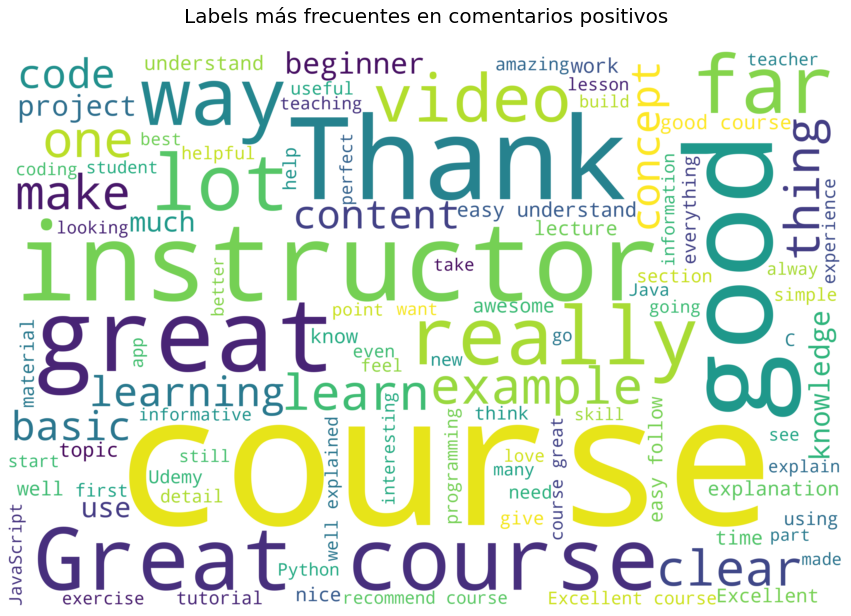

In [48]:
#Nube de palabras con los palabras más frecuentes en comentarios positivos

wordcloud_text = ','.join(str(v) for v in df_reviews_pos['review_content'])
wordcloud_text = WordCloud(background_color = 'white', width = 3000, height = 2000, max_words = 100).generate(wordcloud_text)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.title("Labels más frecuentes en comentarios positivos\n", fontsize = 20)
plt.show()

In [49]:
#Eliminamos las stopwords para quitar artículos, preposiciones, conjunciones, etc

df_reviews_neg['review_content'] = df_reviews_neg['review_content'].apply(lambda x: ' '.join([word 
                                                                    for word in str(x).split() if word not in (stop_words)]))

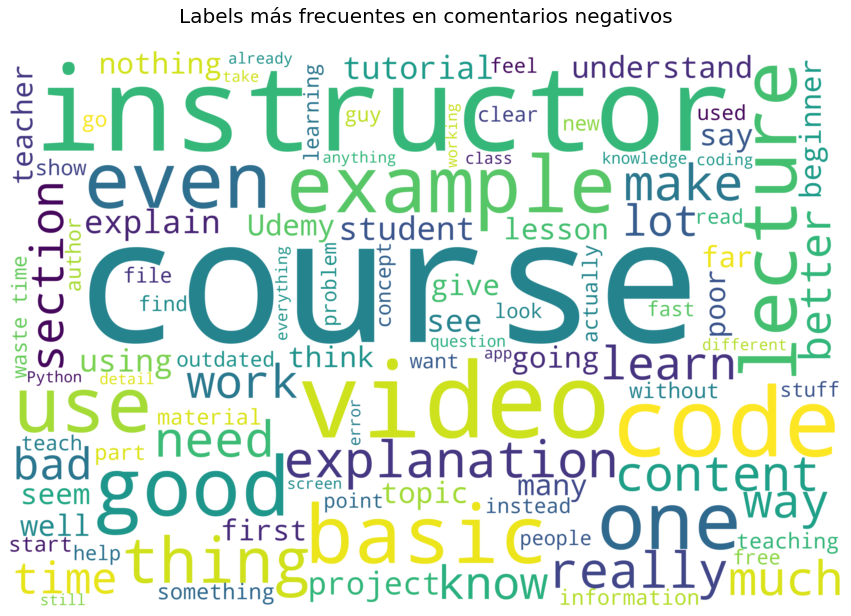

In [50]:
#Nube de palabras con los palabras más frecuentes en comentarios negativos

wordcloud_text = ','.join(str(v) for v in df_reviews_neg['review_content'])
wordcloud_text = WordCloud(background_color = 'white', width = 3000, height = 2000, max_words = 100).generate(wordcloud_text)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.title("Labels más frecuentes en comentarios negativos\n", fontsize = 20)
plt.show()